In [2]:
#Importing all the modules needed

In [3]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4]:
#Importing the dataset

In [5]:
test_df = pd.read_csv('C://Users//divis//OneDrive//Desktop//Titanic//train_and_test2.csv')
train_df = pd.read_csv('C://Users//divis//OneDrive//Desktop//Titanic//train_and_test2.csv')

In [6]:
#getting info about the dataset

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [8]:
train_df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [9]:
train_df.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [10]:
train_df.columns.values

array(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch',
       'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12',
       'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked',
       'zero.17', 'zero.18', '2urvived'], dtype=object)

In [11]:
#Plotting a graph for Age and sex (People survived)

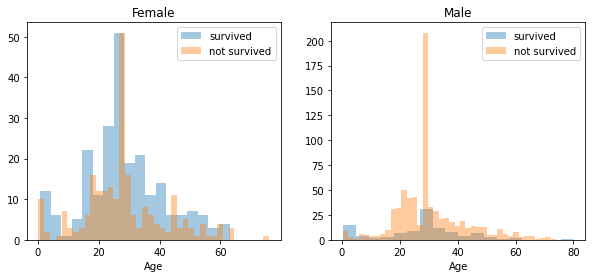

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']==1]
men = train_df[train_df['Sex']==0]
ax = sns.distplot(women[women['2urvived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['2urvived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['2urvived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['2urvived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [14]:
#Removing all the unnecessary columns from the dataset

In [15]:
train_df = train_df.drop(['Passengerid'], axis=1)
train_df = train_df.drop(['Fare'], axis=1)
train_df = train_df.drop(['sibsp'], axis=1)
train_df = train_df.drop(['Parch'], axis=1)
train_df = train_df.drop(['zero'], axis=1)
train_df = train_df.drop(['Pclass'], axis=1)
train_df = train_df.drop(['Embarked'], axis=1)
train_df = train_df.drop(['zero.1'], axis=1)
train_df = train_df.drop(['zero.2'], axis=1)
train_df = train_df.drop(['zero.3'], axis=1)
train_df = train_df.drop(['zero.4'], axis=1)
train_df = train_df.drop(['zero.5'], axis=1)
train_df = train_df.drop(['zero.6'], axis=1)
train_df = train_df.drop(['zero.7'], axis=1)
train_df = train_df.drop(['zero.8'], axis=1)
train_df = train_df.drop(['zero.9'], axis=1)
train_df = train_df.drop(['zero.10'], axis=1)
train_df = train_df.drop(['zero.11'], axis=1)
train_df = train_df.drop(['zero.12'], axis=1)
train_df = train_df.drop(['zero.13'], axis=1)
train_df = train_df.drop(['zero.14'], axis=1)
train_df = train_df.drop(['zero.15'], axis=1)
train_df = train_df.drop(['zero.16'], axis=1)
train_df = train_df.drop(['zero.17'], axis=1)
train_df = train_df.drop(['zero.18'], axis=1)

In [16]:
test_df = test_df.drop(['Passengerid'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['sibsp'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['zero'], axis=1)
test_df = test_df.drop(['Pclass'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['zero.1'], axis=1)
test_df = test_df.drop(['zero.2'], axis=1)
test_df = test_df.drop(['zero.3'], axis=1)
test_df = test_df.drop(['zero.4'], axis=1)
test_df = test_df.drop(['zero.5'], axis=1)
test_df = test_df.drop(['zero.6'], axis=1)
test_df = test_df.drop(['zero.7'], axis=1)
test_df = test_df.drop(['zero.8'], axis=1)
test_df = test_df.drop(['zero.9'], axis=1)
test_df = test_df.drop(['zero.10'], axis=1)
test_df = test_df.drop(['zero.11'], axis=1)
test_df = test_df.drop(['zero.12'], axis=1)
test_df = test_df.drop(['zero.13'], axis=1)
test_df = test_df.drop(['zero.14'], axis=1)
test_df = test_df.drop(['zero.15'], axis=1)
test_df = test_df.drop(['zero.16'], axis=1)
test_df = test_df.drop(['zero.17'], axis=1)
test_df = test_df.drop(['zero.18'], axis=1)

In [17]:
#looking at the finalized datset

In [18]:
train_df.head(10)

,Age,Sex,2urvived
0,22.0,0,0
1,38.0,1,1
2,26.0,1,1
3,35.0,1,1
4,35.0,0,0
5,28.0,0,0
6,54.0,0,0
7,2.0,0,0
8,27.0,1,1
9,14.0,1,1


In [19]:
#Assigning X and Y from the dataset

In [20]:
X_train = train_df.drop("2urvived", axis=1)
X = X_train
Y = train_df["2urvived"]

In [21]:
#splitting the dataset

In [22]:
x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2) #splitting the training and testing dataset

In [23]:
#Testing and training of the model

In [24]:
d = DecisionTreeClassifier()
d.fit(x_train,y_train) #training
y_pred = d.predict(x_test) #testing

In [25]:
#Printing the Accuracy of the Model

In [26]:
print(metrics.classification_report(y_test, y_pred))#classification report
print('Accuracy is -',round(d.score(x_train, y_train) * 100, 2))#printing the test accuracy

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       188
           1       0.66      0.31      0.42        74

    accuracy                           0.76       262
   macro avg       0.72      0.62      0.64       262
weighted avg       0.74      0.76      0.73       262

Accuracy is - 80.71
